# Path Finding Algorithms

## Bibliotecas Básicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline

## Leitura dos dados

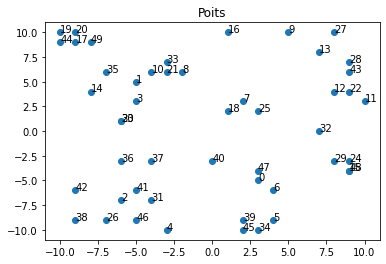

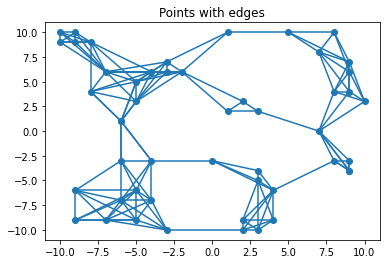

In [2]:
def distancia(x1, y1, x2, y2):
    return np.hypot(x1 - x2, y1 - y2)

data = pd.read_csv('points.csv')
x = np.array(data['x'])
y = np.array(data['y'])

# x = [0, 3, 4, 2, 3]
# y = [0, 2, 3, 3, 5]

n = len(x)

pts = plt.figure()
im1 = pts.add_subplot(1, 1, 1)
im1.scatter(x, y)
im1.set_title('Poits')

for i in range(n):
    plt.text(x[i], y[i], str(i))

plt.show()

r = 5
lines = []
nxt = np.array([ [-1 for j in range(n)] for i in range(n)])
d = np.zeros((n, n))
h = np.zeros((n, n))
edges = []
adj = [ [] for i in range(n) ]

for i in range(n):
    nxt[i][i] = i
    for j in range(i+1, n):
        dij = distancia(x[i], y[i], x[j], y[j])
        h[i][j] = h[j][i] = dij
        if dij <= r:
            lines.append([(x[i], y[i]), (x[j], y[j])])
            adj[i].append([j, dij])
            adj[j].append([i, dij])
            edges.append([i, j, dij])

lc = LineCollection(lines)
edg = plt.figure()
ax1 = edg.add_subplot(1, 1, 1)
ax1.add_collection(lc)
ax1.autoscale()
ax1.scatter(x, y)
ax1.set_title('Points with edges')

plt.show()


## Floyd-Warshal

In [3]:
def floyd_warshal(edges):
    dist = np.full((n, n), np.inf)
    pred = np.full((n, n), None) 
    
    for u, v, w in edges:
        dist[u, v] = w
        dist[v, u] = w
        pred[u, v] = v
        pred[v, u] = u        
        
    for u in range(n):
        dist[u, u] = 0
        pred[u, u] = u
    
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i,j] > dist[i,k] + dist[k,j]:
                    dist[i,j] = dist[i,k] + dist[k,j]
                    pred[i, j] = pred[i, k]

    return dist, pred

def path(u, v, pred):
    if nxt[u, v] == None:
        return []
    
    p = [u]
    
    while u != v:
        u = pred[u][v]
        p.append(u)
        
    return p

In [4]:
dist, pred = floyd_warshal(edges)

In [5]:
PATH = path(0, n-1, pred)
PATH

[0, 40, 37, 23, 14, 49]

In [6]:
dist[0,n-1]

20.683238505927555

Text(0.5, 1.0, 'Path')

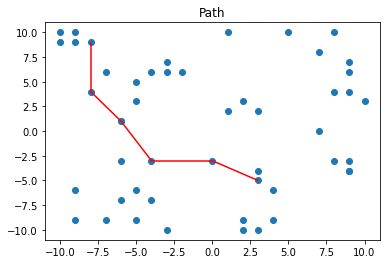

In [7]:
s = 0
lines_path = []
color = []
for i in range(1, len(PATH)):
    s += dist[PATH[i-1], PATH[i]]
    lines_path.append( [(x[PATH[i-1]], y[PATH[i-1]]), (x[PATH[i]], y[PATH[i]])] )
    color.append('r')
axx = plt.figure()
pth = axx.add_subplot(1, 1, 1)
pth.add_collection(LineCollection(lines_path, colors = color))
pth.autoscale()
pth.scatter(x, y)
pth.set_title('Path')